# Introdução
Esse código foi construído para auxiliar na manipulação, limpeza e realização de análises descritivas de um banco de dados. Nesse exemplo iremos utilizar como exemplo o banco de dados “Depression Anxiety Stress Scales Responses” disponível publicamente no site [Kaggle](https://www.kaggle.com/lucasgreenwell/depression-anxiety-stress-scales-responses). Especificadamente vamos nos ater sobre as variáveis do questionário, corrigi-los e interpretá-los utilizando Python e o Jupyter Notebook.
O banco de dados que será utilizado é fruto de uma coleta de dados com quase 40 mil pessoas de vários países com a Depression Anxiety Stress Scales (DASS42), além das variáveis com as respostas dos participantes há outras variáveis sociodemográficas. O principal objetivo da DASS42 é identificar a presença de sintomatologia de depressão, ansiedade e estresse na população. 

Para executar o código abaixo é necessário ter o banco de dados baixado no seu computador. 


## Importando bibliotecas 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Lendo o banco de dados

In [2]:
banco = pd.read_csv("data.csv", sep="\t")
banco

,Q1A,Q1I,Q1E,Q2A,Q2I,Q2E,Q3A,Q3I,Q3E,Q4A,...,screensize,uniquenetworklocation,hand,religion,orientation,race,voted,married,familysize,major
0,4,28,3890,4,25,2122,2,16,1944,4,...,1,1,1,12,1,10,2,1,2,NaN
1,4,2,8118,1,36,2890,2,35,4777,3,...,2,1,2,7,0,70,2,1,4,NaN
2,3,7,5784,1,33,4373,4,41,3242,1,...,2,1,1,4,3,60,1,1,3,NaN
3,2,23,5081,3,11,6837,2,37,5521,1,...,2,1,2,4,5,70,2,1,5,biology
4,2,36,3215,2,13,7731,3,5,4156,4,...,2,2,3,10,1,10,2,1,4,Psychology
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,31,3287,1,5,2216,3,29,3895,2,...,2,1,1,2,4,60,2,1,2,NaN
39771,3,14,4792,4,41,2604,3,15,2668,4,...,1,1,1,10,0,10,2,1,4,Mathematic
39772,2,1,25147,1,4,4555,2,14,3388,1,...,2,1,1,7,1,30,1,2,3,Computer Science
39773,3,36,4286,1,34,2736,2,10,5968,2,...,2,1,1,6,1,60,1,1,2,History


## Criando sub-banco de dados

In [3]:
subbanco = banco[['Q1A', 'Q2A', 'Q3A', 'Q4A', 'Q5A', 'Q6A', 'Q7A', 'Q8A', 'Q9A',
  'Q10A', 'Q11A', 'Q12A', 'Q13A', 'Q14A', 'Q15A', 'Q16A', 'Q17A', 'Q18A','Q19A', 'Q20A', 'Q21A', 'Q22A', 'Q23A', 
  'Q24A', 'Q25A', 'Q26A', 'Q27A','Q28A', 'Q29A', 'Q30A', 'Q31A', 'Q32A', 'Q33A', 'Q34A', 'Q35A', 'Q36A',
       'Q37A', 'Q38A', 'Q39A', 'Q40A', 'Q41A', 'Q42A', 'gender', 'age']]
subbanco

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,gender,age
0,4,4,2,4,4,4,4,4,2,1,...,4,4,1,2,4,3,4,4,2,16
1,4,1,2,3,4,4,3,4,3,2,...,2,3,4,2,2,1,2,2,2,16
2,3,1,4,1,4,3,1,3,2,4,...,3,4,4,4,2,2,1,4,2,17
3,2,3,2,1,3,3,4,2,3,3,...,1,1,2,1,3,4,4,2,2,13
4,2,2,3,4,4,2,4,4,4,3,...,3,4,3,3,3,4,4,3,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,2,1,3,2,3,2,1,3,1,4,...,1,2,4,4,2,3,1,3,1,16
39771,3,4,3,4,3,4,4,4,3,4,...,3,3,3,4,3,3,3,4,1,21
39772,2,1,2,1,1,1,1,1,2,1,...,1,1,1,1,2,1,1,1,2,48
39773,3,1,2,2,3,3,3,4,3,1,...,3,2,1,2,3,2,4,3,2,20


## Recodificando Variáveis 

In [4]:
print(subbanco[['Q1A', 'Q2A', 'Q3A']].max())

print(subbanco[['Q1A', 'Q2A', 'Q3A']].min())

Q1A    4
Q2A    4
Q3A    4
dtype: int64
Q1A    1
Q2A    1
Q3A    1
dtype: int64


In [5]:
dassCol = ['Q2A', 'Q5A', 'Q12A', 'Q13A', 'Q16A', 'Q17A', 'Q20A', 'Q23A', 'Q25A',
       'Q26A', 'Q31A', 'Q32A', 'Q36A', 'Q41A', 'Q1A', 'Q6A', 'Q8A', 'Q10A',
       'Q11A', 'Q14A', 'Q21A', 'Q22A', 'Q27A', 'Q28A', 'Q34A', 'Q37A', 'Q40A',
       'Q42A', 'Q3A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q18A', 'Q19A', 'Q24A',
       'Q29A', 'Q30A', 'Q33A', 'Q35A', 'Q38A', 'Q39A']

def mudarValores(x):
    if x == 1:
        return 0
    if x == 2:
        return 1
    if x == 3:
        return 2
    return 3


for col in dassCol:
    subbanco[col] = subbanco[col].map(mudarValores)
    
subbanco

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q35A,Q36A,Q37A,Q38A,Q39A,Q40A,Q41A,Q42A,gender,age
0,3,3,1,3,3,3,3,3,1,0,...,3,3,0,1,3,2,3,3,2,16
1,3,0,1,2,3,3,2,3,2,1,...,1,2,3,1,1,0,1,1,2,16
2,2,0,3,0,3,2,0,2,1,3,...,2,3,3,3,1,1,0,3,2,17
3,1,2,1,0,2,2,3,1,2,2,...,0,0,1,0,2,3,3,1,2,13
4,1,1,2,3,3,1,3,3,3,2,...,2,3,2,2,2,3,3,2,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,1,0,2,1,2,1,0,2,0,3,...,0,1,3,3,1,2,0,2,1,16
39771,2,3,2,3,2,3,3,3,2,3,...,2,2,2,3,2,2,2,3,1,21
39772,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,2,48
39773,2,0,1,1,2,2,2,3,2,0,...,2,1,0,1,2,1,3,2,2,20


In [6]:
print(subbanco[['Q1A', 'Q2A', 'Q3A']].max())

print(subbanco[['Q1A', 'Q2A', 'Q3A']].min())

Q1A    3
Q2A    3
Q3A    3
dtype: int64
Q1A    0
Q2A    0
Q3A    0
dtype: int64


## Criando categorias: cálculo dos escores brutos

In [7]:
# Depressão itens 2,5,12,13,16,17,20,23,25,26,31,32,36,41
subbanco['depressao'] = subbanco[['Q2A', 'Q5A', 'Q12A', 'Q13A', 'Q16A', 'Q17A', 'Q20A', 'Q23A', 'Q25A', 'Q26A', 'Q31A', 'Q32A', 'Q36A', 'Q41A']].sum(axis=1)

#ansiedade itens 1,6,8,10,11,14,21,22,27,28,34,37,40,42
subbanco['ansiedade'] = subbanco[['Q1A', 'Q6A', 'Q8A', 'Q10A', 'Q11A', 'Q14A', 'Q21A', 'Q22A', 'Q27A', 'Q28A', 'Q34A', 'Q37A', 'Q40A', 'Q42A']].sum(axis=1)

#estesse itens 3,4,7,9,15,18,19,24,29,30,33,35,38
subbanco['estresse'] = subbanco[['Q3A', 'Q4A', 'Q7A', 'Q9A', 'Q15A', 'Q18A', 'Q19A', 'Q24A', 'Q29A', 'Q30A', 'Q33A', 'Q35A', 'Q38A', 'Q39A']].sum(axis=1)

subbanco[['depressao', 'ansiedade', 'estresse']]

,depressao,ansiedade,estresse
0,40,30,31
1,21,27,20
2,22,26,20
3,14,21,14
4,38,29,34
...,...,...,...
39770,20,26,17
39771,35,37,34
39772,2,2,6
39773,18,25,19


## Criando classificações: classificando os escores

Agora que já temos os escores brutos podemos utilizar os pontos de corte para criar as classificações de cada categoria. Vamos tomar como base o estudo de [Crawford & Henry (2003)](https://onlinelibrary.wiley.com/doi/10.1348/014466503321903544):


|            | Normal | Leve | Moderado | Severo | Extremamente Severo |
|------------|--------|------|----------|--------|---------------------|
|  Depressão | 0-9    | 10-13| 14-20    | 21-27  | 28+                 |
|  Ansiedade | 0-7    | 8-9	 | 10-14    | 15-19  | 20+                 |
|  Estresse  | 0-14   | 15-18| 19-25    | 26-33  | 34+                 |


In [8]:
def depreClass(x):
    if x < 10:
        return 'Normal'
    if x < 14:
        return 'Leve'
    if x < 21:
        return 'Moderado'
    if x < 28:
        return 'Severo'
    return 'Extremamente_Severo'

def ansiClass(x):
    if x < 8:
        return 'Normal'
    if x < 10:
        return 'Leve'
    if x < 15:
        return 'Moderado'
    if x < 20:
        return 'Severo'
    return 'Extremamente_Severo'

def estrClass(x):
    if x < 15:
        return 'Normal'
    if x < 19:
        return 'Leve'
    if x < 25:
        return 'Moderado'
    if x < 34:
        return 'Severo'
    return 'Extremamente_Severo'

In [9]:
subbanco['depressaoClas'] = subbanco['depressao'].map(depreClass)
subbanco['ansiedadeClas'] = subbanco['ansiedade'].map(ansiClass)
subbanco['estresseClas'] = subbanco['estresse'].map(estrClass)

subbanco[['depressaoClas','ansiedadeClas', 'estresseClas']]

,depressaoClas,ansiedadeClas,estresseClas
0,Extremamente_Severo,Extremamente_Severo,Severo
1,Severo,Extremamente_Severo,Moderado
2,Severo,Extremamente_Severo,Moderado
3,Moderado,Extremamente_Severo,Normal
4,Extremamente_Severo,Extremamente_Severo,Extremamente_Severo
...,...,...,...
39770,Moderado,Extremamente_Severo,Leve
39771,Extremamente_Severo,Extremamente_Severo,Extremamente_Severo
39772,Normal,Normal,Normal
39773,Moderado,Extremamente_Severo,Moderado


## Análise de missing 

In [10]:
subbanco.isna().sum()

Q1A              0
Q2A              0
Q3A              0
Q4A              0
Q5A              0
Q6A              0
Q7A              0
Q8A              0
Q9A              0
Q10A             0
Q11A             0
Q12A             0
Q13A             0
Q14A             0
Q15A             0
Q16A             0
Q17A             0
Q18A             0
Q19A             0
Q20A             0
Q21A             0
Q22A             0
Q23A             0
Q24A             0
Q25A             0
Q26A             0
Q27A             0
Q28A             0
Q29A             0
Q30A             0
Q31A             0
Q32A             0
Q33A             0
Q34A             0
Q35A             0
Q36A             0
Q37A             0
Q38A             0
Q39A             0
Q40A             0
Q41A             0
Q42A             0
gender           0
age              0
depressao        0
ansiedade        0
estresse         0
depressaoClas    0
ansiedadeClas    0
estresseClas     0
dtype: int64

## Excluindo Casos 

In [11]:
print(subbanco.age.min())
print(subbanco.age.max())
print(subbanco.gender.min())
print(subbanco.gender.max())

13
1998
0
3


In [12]:
print(subbanco.age[subbanco.age > 120])
print(subbanco.gender[subbanco.gender == 0])

5340      223
10231    1996
21383    1998
30027    1993
33730    1991
Name: age, dtype: int64
361      0
376      0
1035     0
1541     0
2147     0
        ..
38933    0
39058    0
39451    0
39719    0
39755    0
Name: gender, Length: 67, dtype: int64


In [13]:
subbanco = subbanco[subbanco.age < 120]
subbanco = subbanco[subbanco.gender > 0]
subbanco

,Q1A,Q2A,Q3A,Q4A,Q5A,Q6A,Q7A,Q8A,Q9A,Q10A,...,Q41A,Q42A,gender,age,depressao,ansiedade,estresse,depressaoClas,ansiedadeClas,estresseClas
0,3,3,1,3,3,3,3,3,1,0,...,3,3,2,16,40,30,31,Extremamente_Severo,Extremamente_Severo,Severo
1,3,0,1,2,3,3,2,3,2,1,...,1,1,2,16,21,27,20,Severo,Extremamente_Severo,Moderado
2,2,0,3,0,3,2,0,2,1,3,...,0,3,2,17,22,26,20,Severo,Extremamente_Severo,Moderado
3,1,2,1,0,2,2,3,1,2,2,...,3,1,2,13,14,21,14,Moderado,Extremamente_Severo,Normal
4,1,1,2,3,3,1,3,3,3,2,...,3,2,2,19,38,29,34,Extremamente_Severo,Extremamente_Severo,Extremamente_Severo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39770,1,0,2,1,2,1,0,2,0,3,...,0,2,1,16,20,26,17,Moderado,Extremamente_Severo,Leve
39771,2,3,2,3,2,3,3,3,2,3,...,2,3,1,21,35,37,34,Extremamente_Severo,Extremamente_Severo,Extremamente_Severo
39772,1,0,1,0,0,0,0,0,1,0,...,0,0,2,48,2,2,6,Normal,Normal,Normal
39773,2,0,1,1,2,2,2,3,2,0,...,3,2,2,20,18,25,19,Moderado,Extremamente_Severo,Moderado


# Análise descritiva 

## describe()

In [14]:
subbanco[['depressao', 'ansiedade', 'estresse', 'age']].describe()

,depressao,ansiedade,estresse,age
count,39703.000000,39703.000000,39703.000000,39703.000000
mean,18.865652,21.331562,18.066620,23.412941
std,10.258005,10.736243,9.924051,8.610509
min,0.000000,0.000000,0.000000,13.000000
25%,11.000000,13.000000,10.000000,18.000000
50%,19.000000,21.000000,17.000000,21.000000
75%,27.000000,30.000000,25.000000,25.000000
max,42.000000,42.000000,42.000000,117.000000


## value_counts

In [15]:
subbanco[['depressaoClas', 'ansiedadeClas', 'estresseClas', 'gender']].apply(pd.Series.value_counts)

,depressaoClas,ansiedadeClas,estresseClas,gender
1,NaN,NaN,NaN,8788.0
2,NaN,NaN,NaN,30363.0
3,NaN,NaN,NaN,552.0
Extremamente_Severo,8875.0,22160.0,3020.0,NaN
Leve,4854.0,1822.0,5616.0,NaN
Moderado,8945.0,5223.0,7643.0,NaN
Normal,8535.0,4751.0,15707.0,NaN
Severo,8494.0,5747.0,7717.0,NaN


## Mediana, quartil, moda, variância

In [16]:
print('Mediana:')
print(subbanco['depressao'].median()) #mediana

print('Quartil:')
print(subbanco['depressao'].quantile()) #quartil

print('Moda:')
print(subbanco['depressao'].mode()) #moda

print('Variância:')
print(subbanco['depressao'].var()) #variância

Mediana:
19.0
Quartil:
19.0
Moda:
0    17
dtype: int64
Variância:
105.22667347419839


## groupby()

In [17]:
subbanco.groupby('gender')['depressao', 'ansiedade', 'estresse'].mean()

,depressao,ansiedade,estresse
gender,,,
1,16.997041,19.250569,16.053710
2,19.318282,21.843296,18.558772
3,23.717391,26.313406,23.041667


In [18]:
subbanco[subbanco.depressao > 9].groupby('gender')['depressao'].count()

gender
1     6441
2    24214
3      513
Name: depressao, dtype: int64

## Histograma

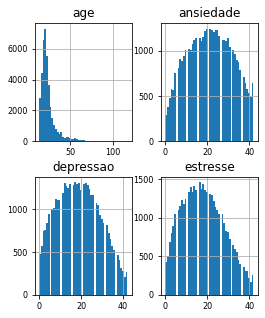

In [19]:
subbanco[['depressao', 'ansiedade', 'estresse', 'age']].hist(figsize=(4, 5), bins=50, xlabelsize=8, ylabelsize=8);

## Gráfico de barras

Text(0.5, 1.0, 'Estresse')

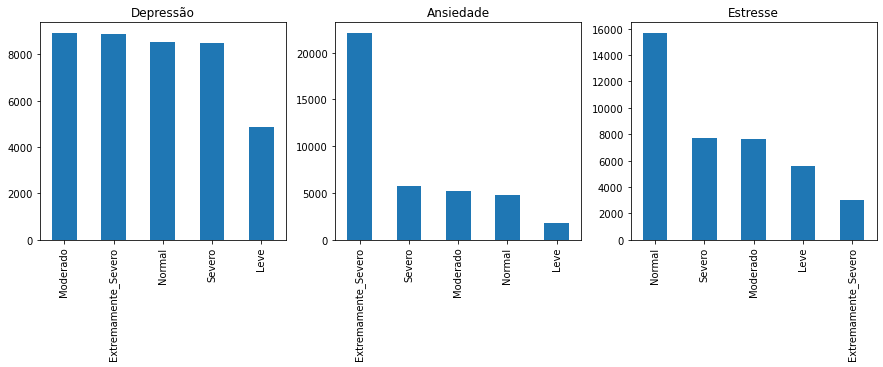

In [20]:
plt.figure(figsize=(15, 4))

ax = plt.subplot(1, 3, 1)
subbanco['depressaoClas'].value_counts().plot(ax=ax, kind='bar')
ax.set_title('Depressão')
ax = plt.subplot(1, 3, 2)
subbanco['ansiedadeClas'].value_counts().plot(ax=ax, kind='bar')
ax.set_title('Ansiedade')
ax = plt.subplot(1, 3, 3)
subbanco['estresseClas'].value_counts().plot(ax=ax, kind='bar')
ax.set_title('Estresse')